#### Tensorflow and sklearn library specific settings to supress warning and other warnings

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

import warnings
from sklearn.exceptions import InconsistentVersionWarning

# Filter out the specific warning
warnings.filterwarnings("ignore", category=InconsistentVersionWarning)

#### 1. Import AxonANNModel and Visualization model

In [2]:
from axon_ann import AxonANNModel
from visualization import Visualization


2024-04-29 15:07:13.546863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 15:07:13.546896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 15:07:13.548085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 15:07:14.483102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### 2. Inputs

In [3]:
lead_id = '6172' 
electrode_list = [1, 0, 0, 0, 0, -1, 0, 0]
stimulation_amp = 3 # [V]
pulse_width = 90 #[us]
num_axons = 10
min_distance = 1
max_distance = 5
axon_diameter = 6 # [um]

#### 3. Create axon_ann_model by passing all required inputs

In [4]:
axon_ann_model = AxonANNModel(lead_id, electrode_list, pulse_width, stimulation_amp,  num_axons, min_distance, max_distance, axon_diameter)

#### 4. Calculate and return  axon coordinates

In [5]:
x_axon, y_axon, z_axon = axon_ann_model.axon_coord()


#### 5. Calculate Electric potential across axons

In [6]:
phi_axon = axon_ann_model.field_ann()


2024-04-29 15:07:15.658181: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


2/2 [==============================] - 0s 2ms/step


#### 6. calculate axon activation

In [7]:
axon_act = axon_ann_model.axon_ann()

1/1 [==============================] - 0s 58ms/step


#### 7. Create instance of visualization for plot

In [8]:
visualization = Visualization(lead_id, stimulation_amp, num_axons, x_axon, z_axon, phi_axon, axon_act)

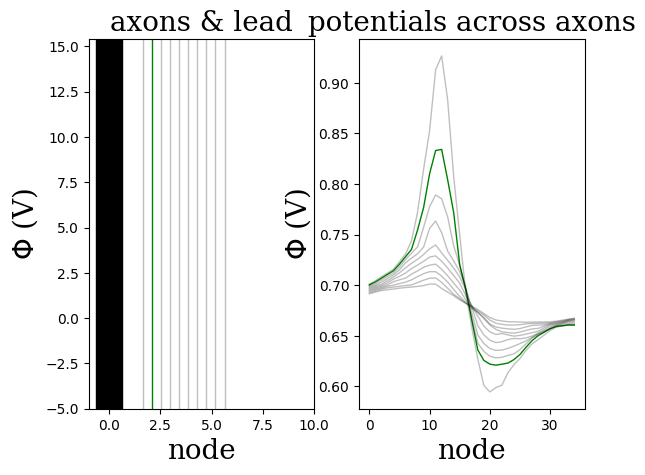

In [9]:
visualization.visualize()

#### 8 .Demo on how to change inputs and re-generate plot

In [10]:
axon_ann_model.electrode_list = [0, 1, 1, 1, 1, 1, 1, 0]
axon_ann_model.stimulation_amp = 10

In [11]:
x_axon, y_axon, z_axon = axon_ann_model.axon_coord()
phi_axon = axon_ann_model.field_ann()

2/2 [==============================] - 0s 2ms/step


In [12]:
axon_act = axon_ann_model.axon_ann()

1/1 [==============================] - 0s 57ms/step


In [13]:
visualization = Visualization(lead_id, stimulation_amp, num_axons, x_axon, z_axon, phi_axon, axon_act)

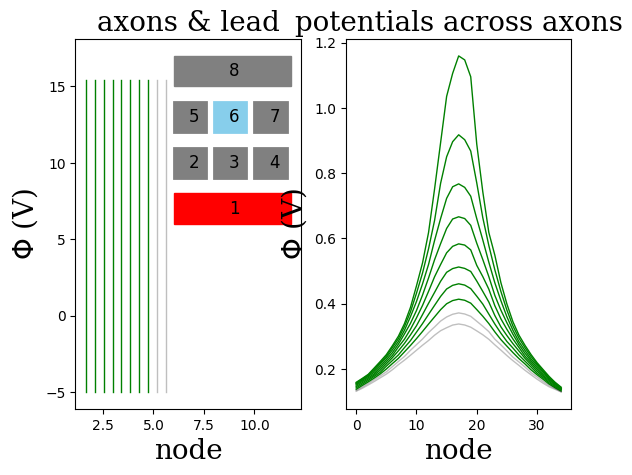

In [14]:
visualization.visualize1(electrode_list)